# RECRUIT 日本橋ハーフマラソン 2023冬（AtCoder Heuristic Contest 018）
https://atcoder.jp/contests/ahc018

In [1]:
import os
import tqdm
import numpy as np
# import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Cs = []
for i in range(8):
    Cs.append(2**i)
Cs

[1, 2, 4, 8, 16, 32, 64, 128]

In [3]:
INPATH = "tools/in"

In [4]:
S = np.empty((100, 200, 200), dtype=int)

In [6]:
for i in range(100):
# for i in range(2):
    file_name = os.path.join(INPATH, str(i).zfill(4) + ".txt")
    # print(file_name)
    with open(file_name) as f:
        N, W, K, C = map(int, f.readline().rstrip().split())
        # print(N, W, K, C)
        S[i] = np.array(list([[int(s) for s in f.readline().rstrip().split()] for _ in range(N)]))
        # print(S[:2])

In [7]:
S.mean(), np.median(S)

(779.136088, 236.0)

In [8]:
Ps = np.arange(10, 401, dtype=int)
Ps

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [9]:
c = 2
y = []
for p in Ps:
    y.append(np.ceil(S/p).sum() * (p+c))

In [10]:
Ps[np.argmin(y)]

51

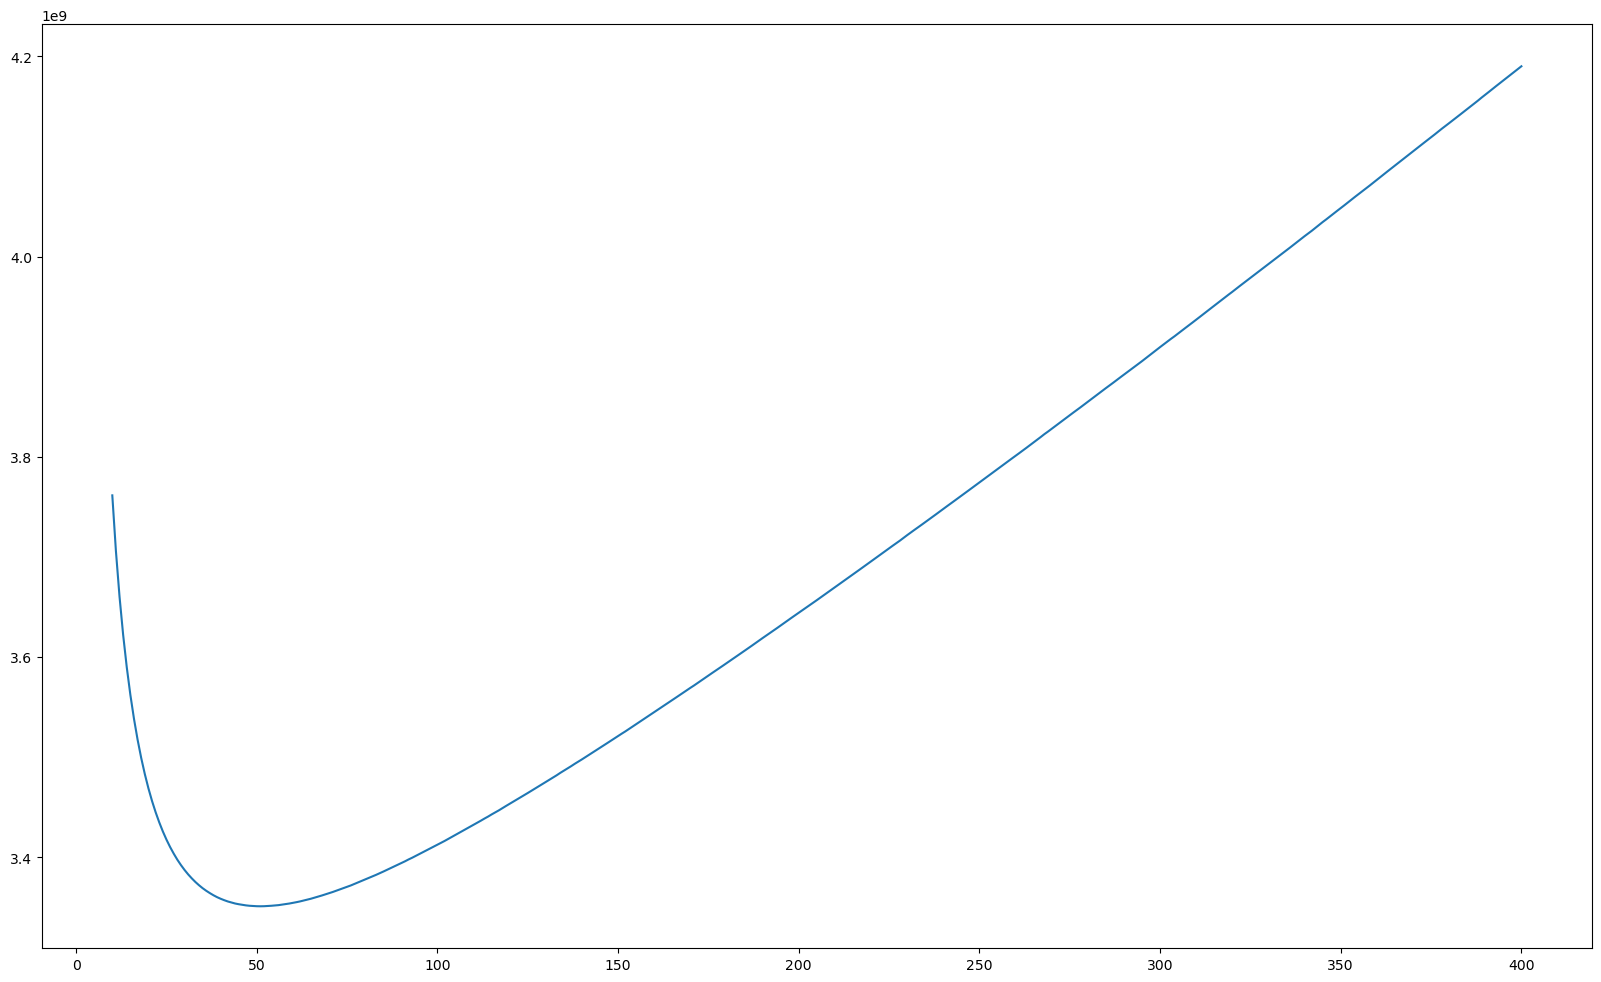

In [11]:
plt.figure(figsize=(20,12))
plt.plot(Ps, y)
plt.show()

In [12]:
best_ps = []
for c in Cs:
    y = []
    for p in Ps:
        y.append(np.ceil(S/p).sum() * (p+c))
    print(c, Ps[np.argmin(y)])
    best_ps.append(Ps[np.argmin(y)])

1 36
2 51
4 71
8 100
16 137
32 192
64 264
128 365


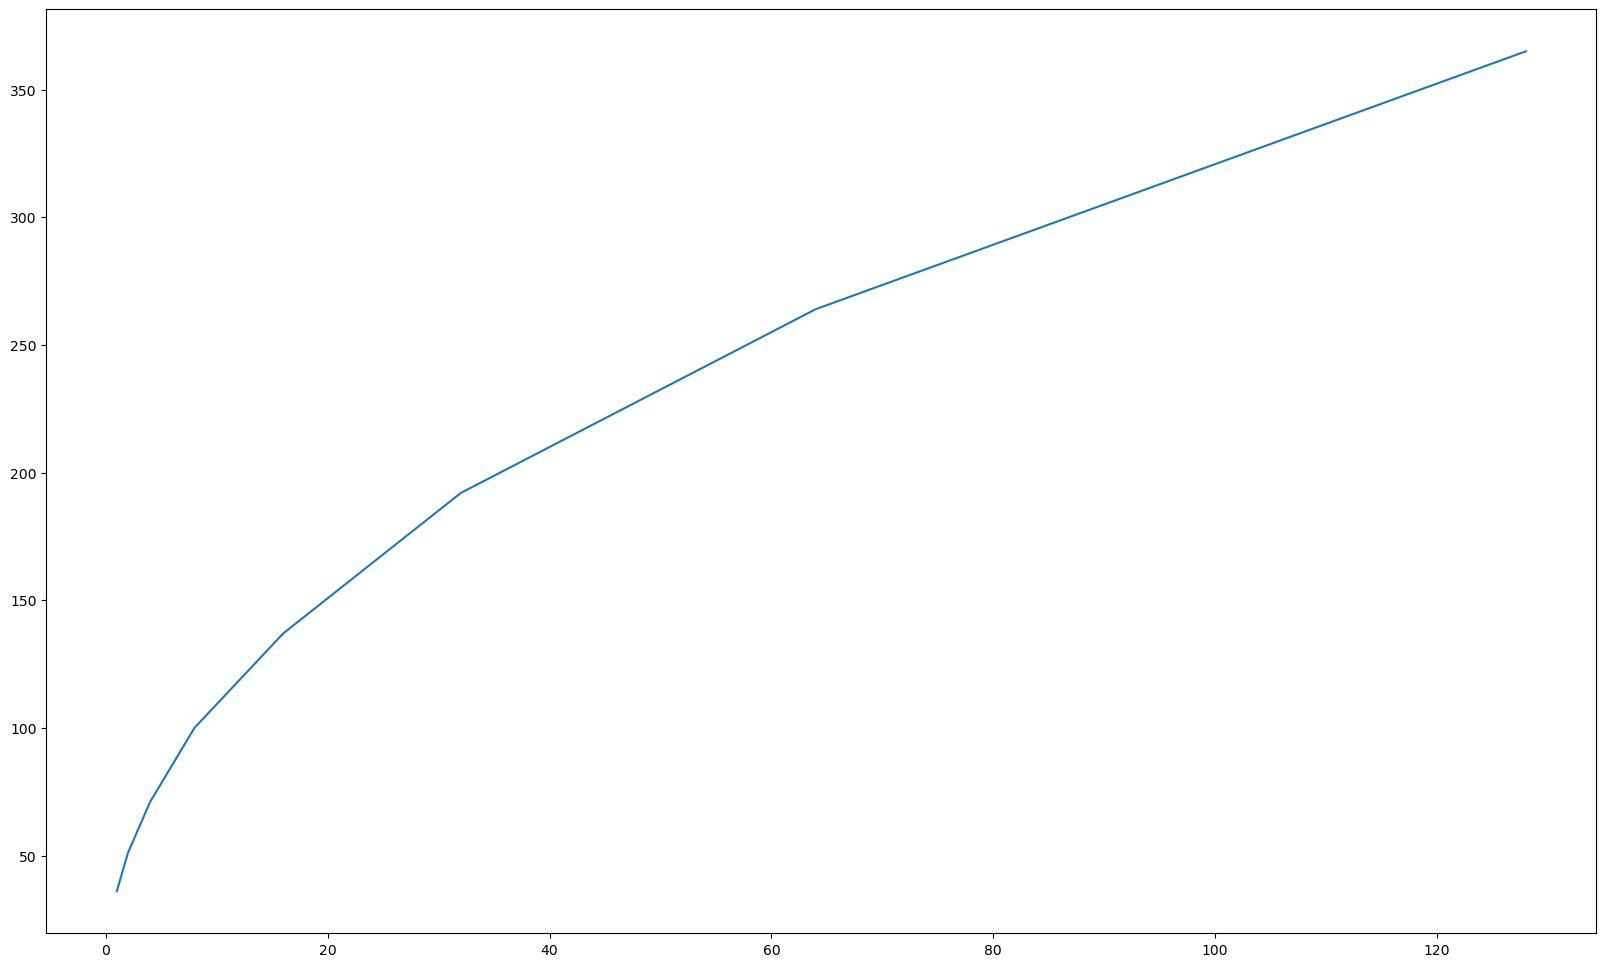

In [13]:
plt.figure(figsize=(20,12))
plt.plot(Cs, best_ps)
plt.show()

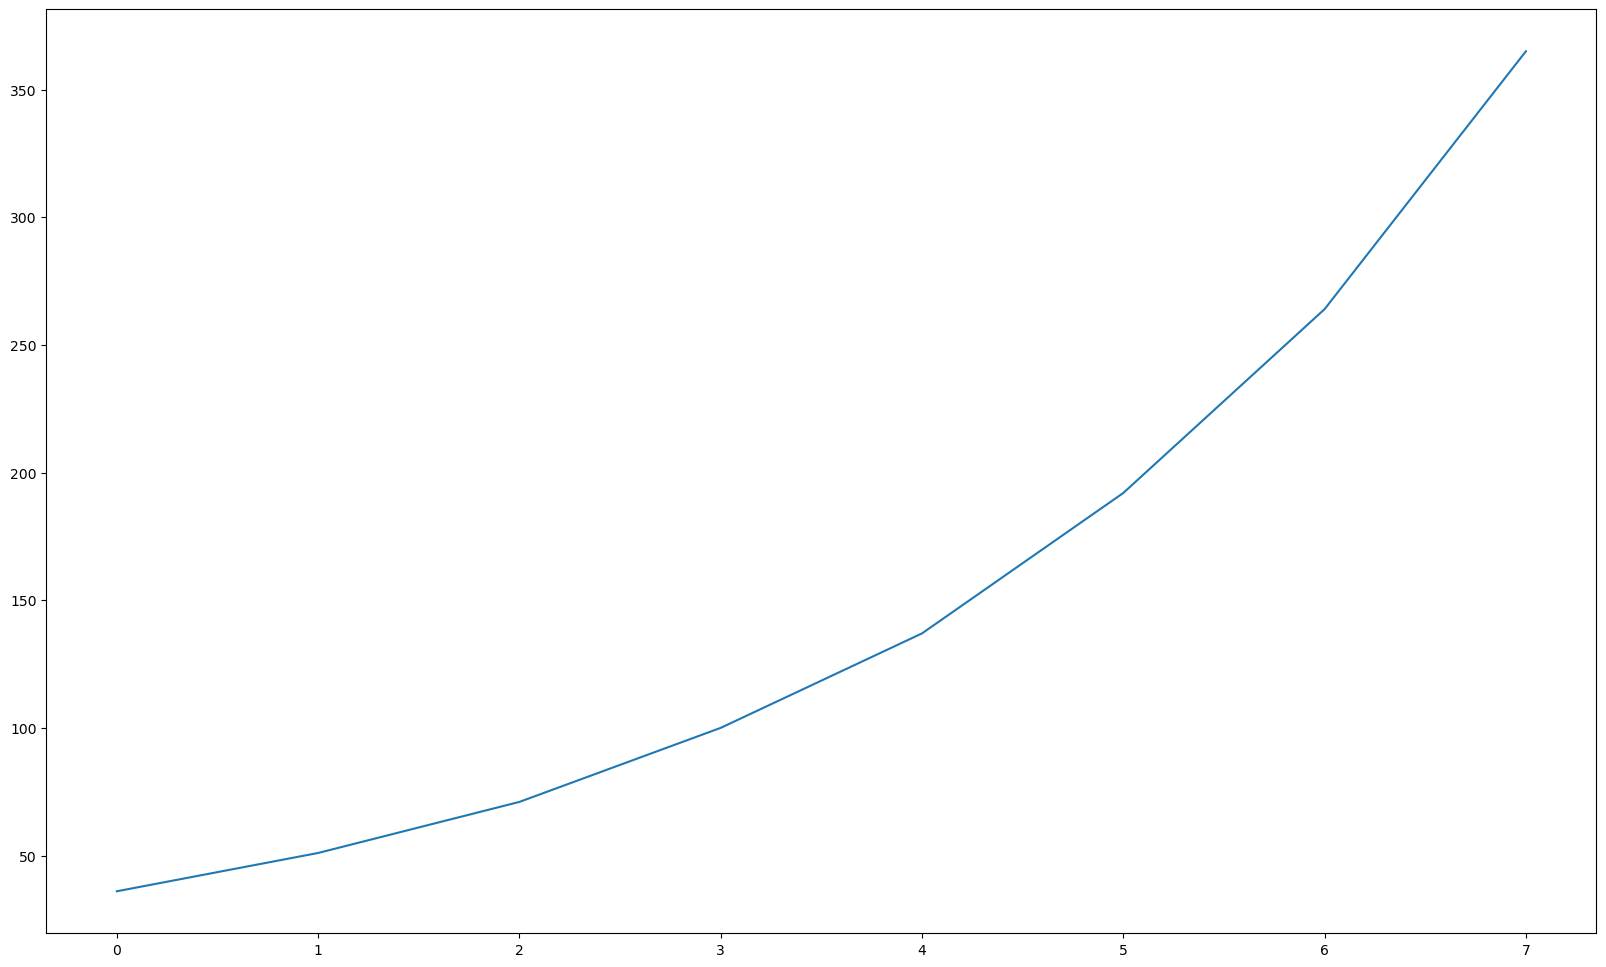

In [14]:
plt.figure(figsize=(20,12))
plt.plot(range(0, 8), best_ps)
plt.show()

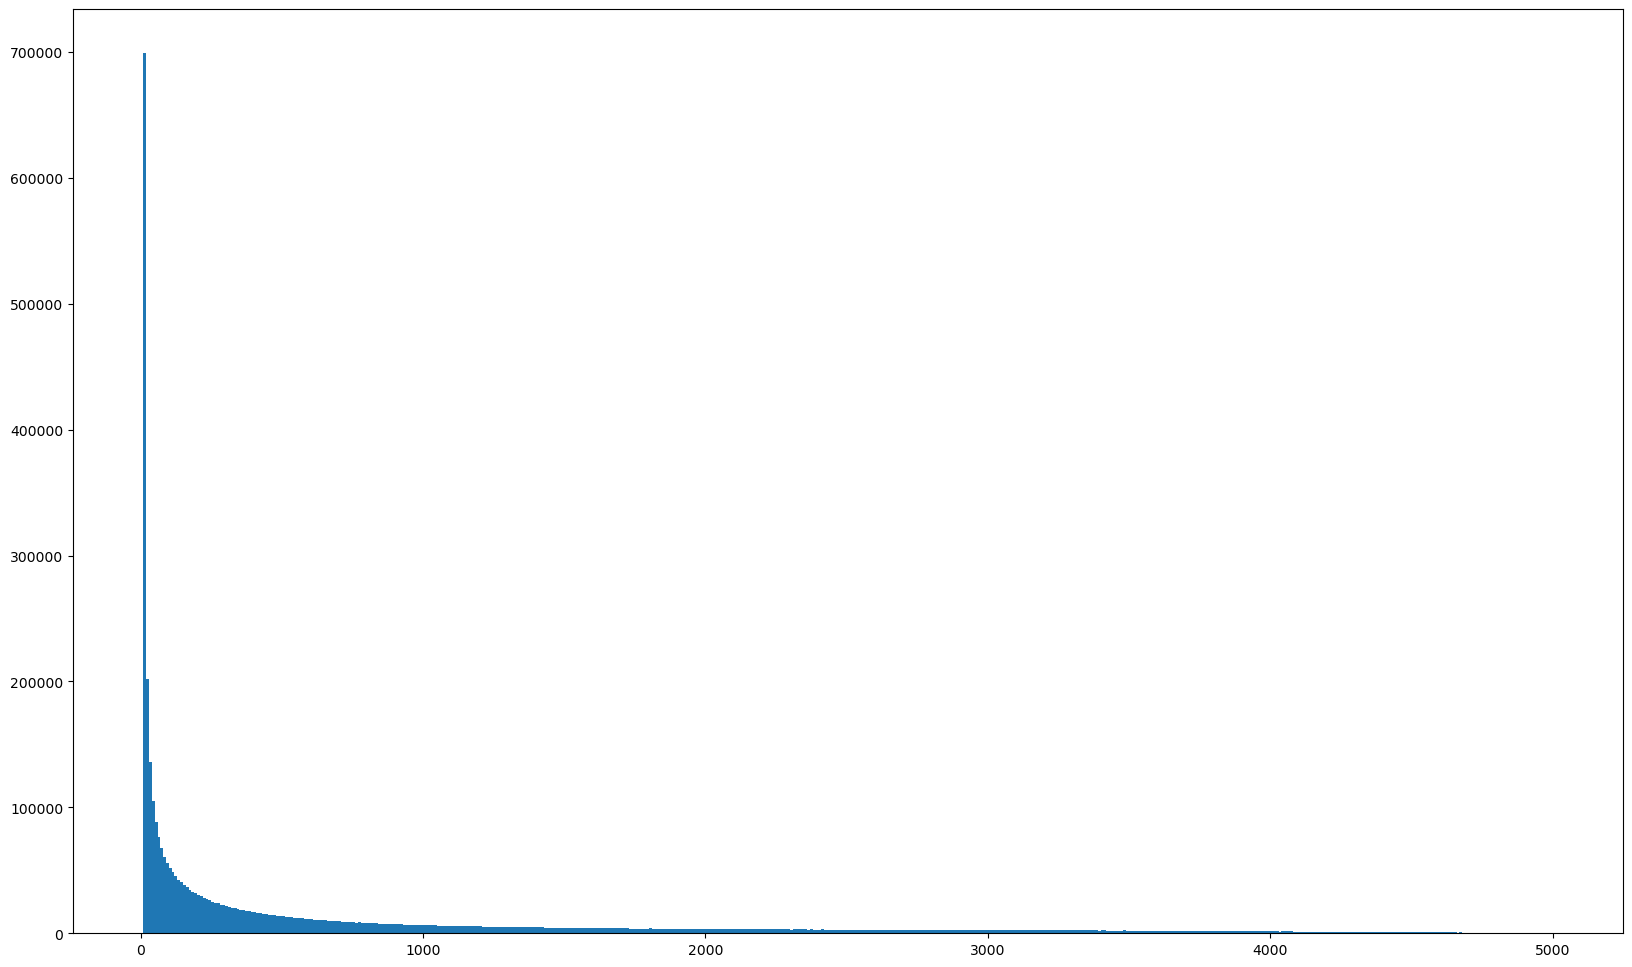

In [15]:
plt.figure(figsize=(20,12))
plt.hist(S.flatten(), bins=499)
plt.show()

In [16]:
# パーセンタイル
for p in range(101):
    print(p, np.percentile(S, p))

0 10.0
1 10.0
2 10.0
3 10.0
4 10.0
5 11.0
6 11.0
7 11.0
8 11.0
9 12.0
10 12.0
11 13.0
12 14.0
13 14.0
14 15.0
15 16.0
16 18.0
17 19.0
18 20.0
19 22.0
20 24.0
21 26.0
22 28.0
23 31.0
24 34.0
25 37.0
26 40.0
27 43.0
28 47.0
29 51.0
30 56.0
31 61.0
32 66.0
33 71.0
34 77.0
35 83.0
36 90.0
37 97.0
38 105.0
39 113.0
40 121.0
41 130.0
42 140.0
43 149.0
44 160.0
45 171.0
46 183.0
47 195.0
48 208.0
49 222.0
50 236.0
51 251.0
52 267.0
53 284.0
54 302.0
55 321.0
56 342.0
57 363.0
58 385.0
59 409.0
60 434.0
61 460.0
62 489.0
63 518.0
64 550.0
65 584.0
66 620.0
67 658.0
68 698.0
69 742.0
70 788.0
71 837.0
72 890.0
73 946.0
74 1006.0
75 1069.0
76 1137.0
77 1209.0
78 1286.0
79 1368.0
80 1454.0
81 1546.0
82 1642.0
83 1744.0
84 1852.0
85 1965.0
86 2084.0
87 2208.0
88 2336.0
89 2470.0
90 2608.0
91 2750.0
92 2896.0
93 3050.0
94 3211.0
95 3384.0
96 3571.0
97 3783.0
98 4036.0
99 4360.0
100 5000.0


In [17]:
ratios = []
max_ratio = 0.0
for t in range(100):
    for i in range(200):
        for j in range(200):
            if i!=0:
                if S[t,i-1,j]>S[t,i,j]:
                    ratio = S[t,i-1,j]/S[t,i,j]
                else:
                    ratio = S[t,i,j]/S[t,i-1,j]
                max_ratio = max(max_ratio, ratio)
                ratios.append(ratio)
            if j!=0:
                if S[t,i,j-1]>S[t,i,j]:
                    ratio = S[t,i,j-1]/S[t,i,j]
                else:
                    ratio = S[t,i,j]/S[t,i,j-1]
                max_ratio = max(max_ratio, ratio)
                ratios.append(ratio)
print(max_ratio)

3.5714285714285716


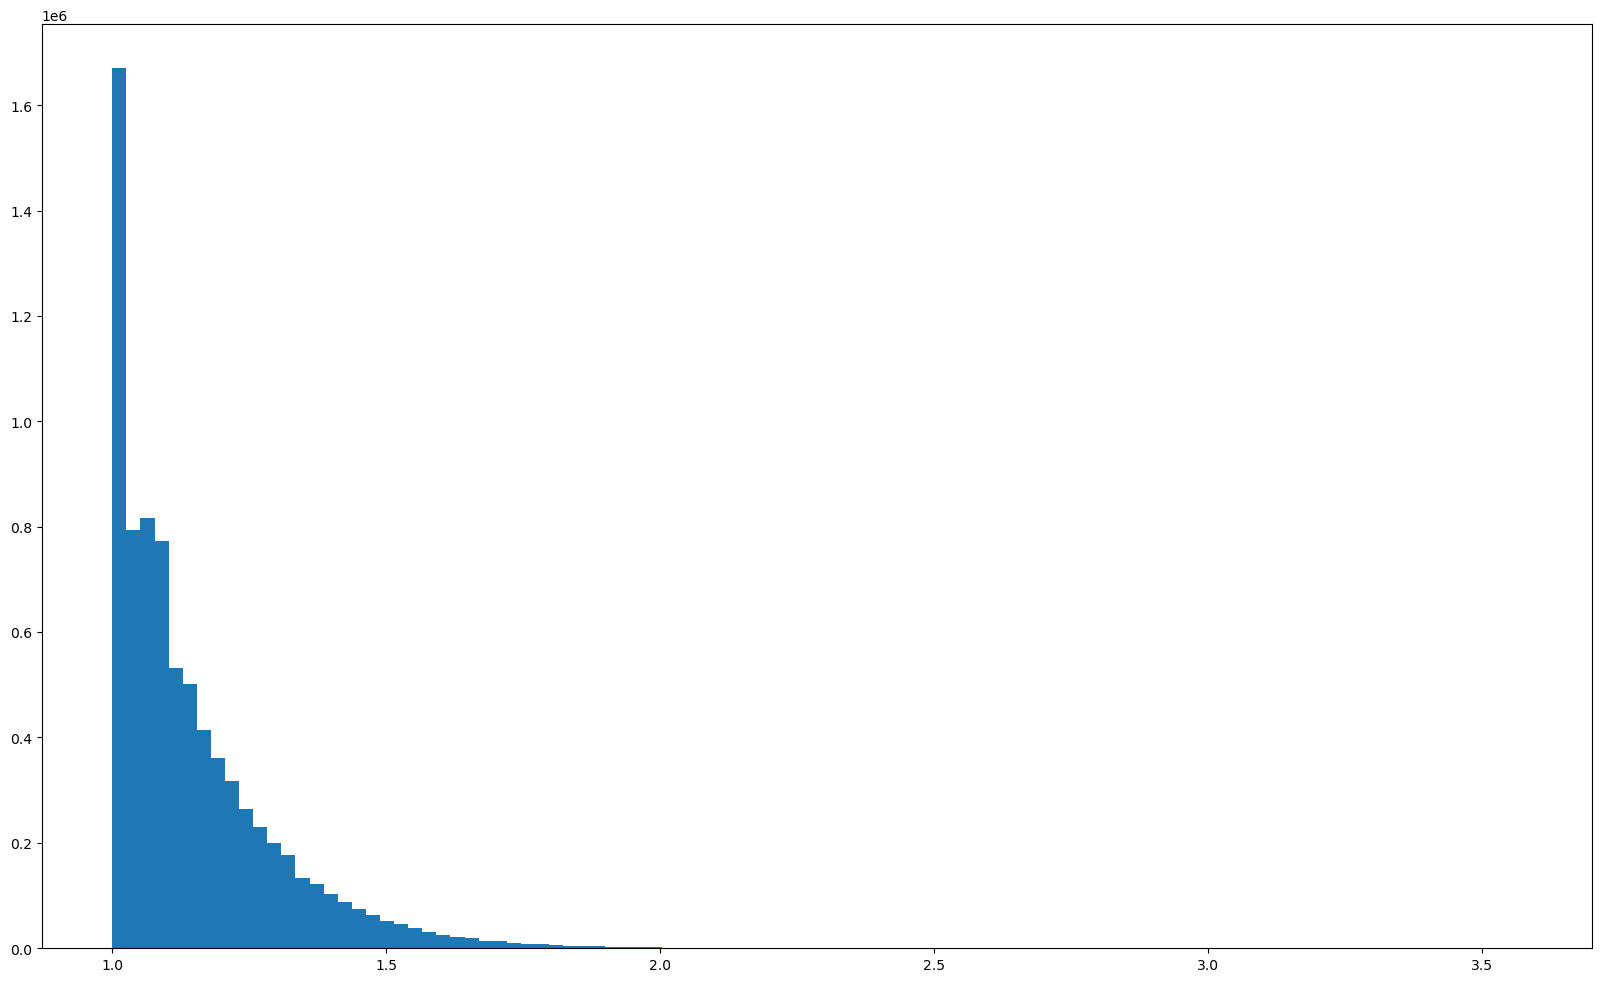

In [73]:
plt.figure(figsize=(20,12))
plt.hist(ratios, bins=100)
plt.show()

In [74]:
# パーセンタイル
for p in range(101):
    print(p, np.percentile(ratios, p))

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.000646830530401
12 1.0035703659625113
13 1.006141804290885
14 1.0086206896551724
15 1.0110775427995973
16 1.0135135135135136
17 1.0159574468085106
18 1.0183955033214103
19 1.0208333333333333
20 1.0232954545454545
21 1.0257731958762886
22 1.028301886792453
23 1.0307813733228097
24 1.0333333333333334
25 1.0357941834451903
26 1.0384615384615385
27 1.041062801932367
28 1.0435043504350434
29 1.0462962962962963
30 1.048955223880597
31 1.0516199890170237
32 1.0542168674698795
33 1.0568181818181819
34 1.0592007260951515
35 1.0625
36 1.0647382920110193
37 1.0667068450480626
38 1.0701581027667983
39 1.0718475073313782
40 1.075268817204301
41 1.0769230769230769
42 1.08
43 1.0833333333333333
44 1.0838788870703764
45 1.0874006810442678
46 1.0909090909090908
47 1.0909090909090908
48 1.0949152542372882
49 1.0984455958549222
50 1.1
51 1.1031578947368421
52 1.1066782307025151
53 1.1111111111111112
54 1.1143552311435523
55 1.1178057

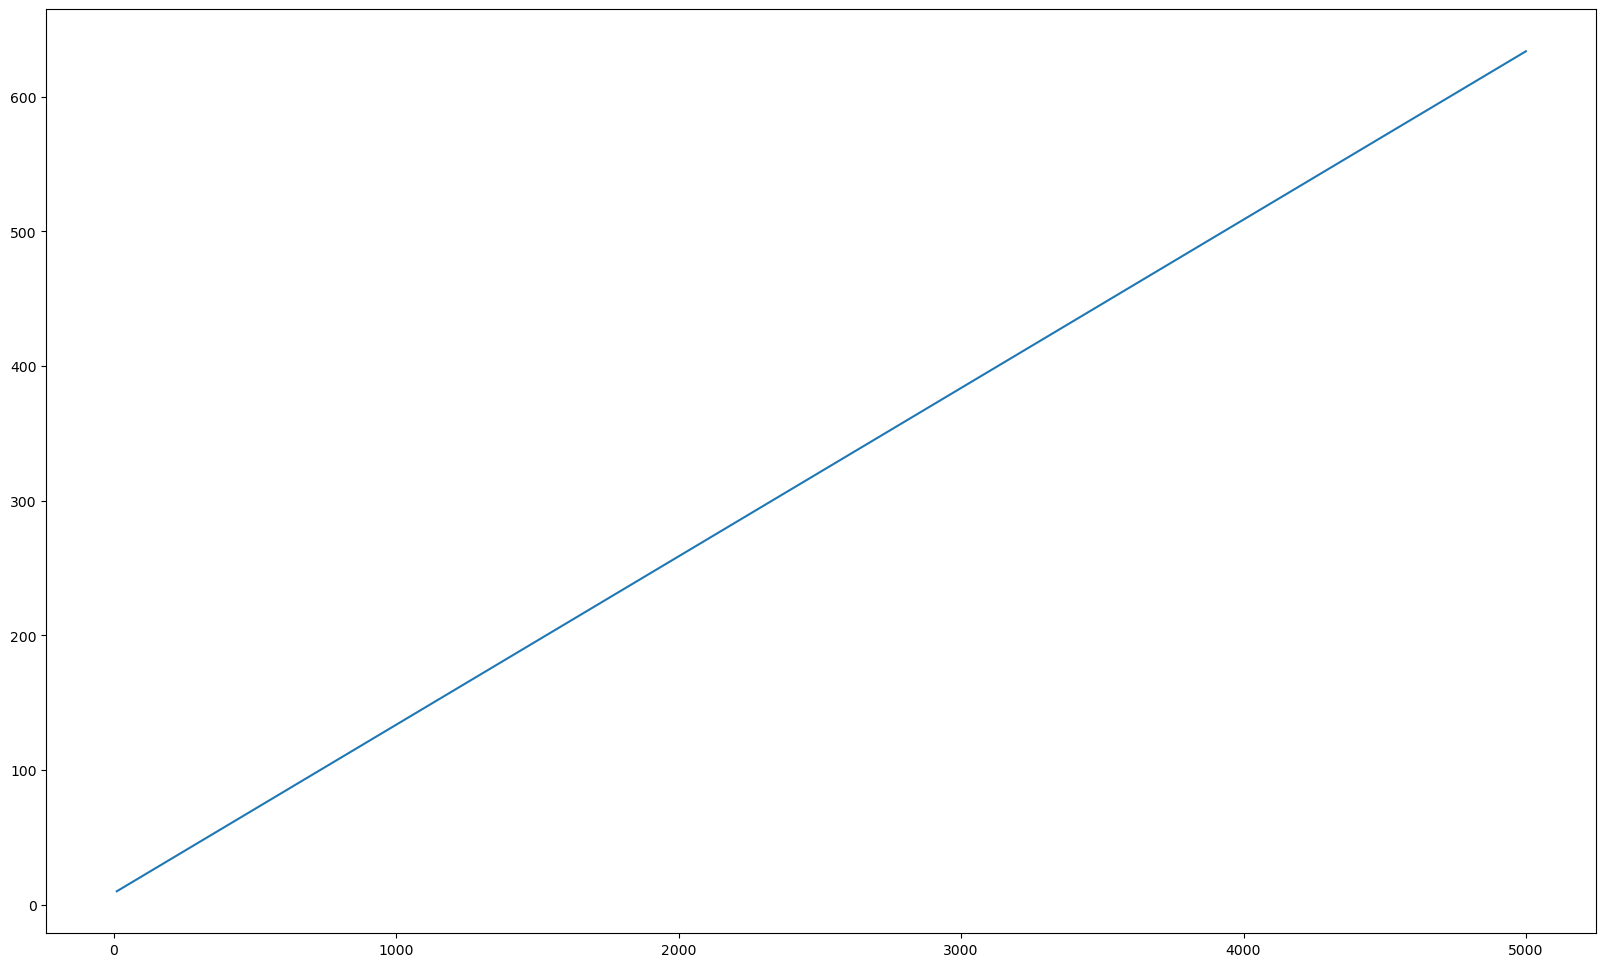

In [19]:
x = np.arange(10, 5001)

def f(x):
    return ((x-10)**(1/3)/2)**3+10

y = f(x)
plt.figure(figsize=(20,12))
plt.plot(x, y)
plt.show()

## 確率分布

In [ ]:
from scipy.stats import uniform

In [68]:
N = 200

In [69]:
def randf(L=0.0, U=1.0):
    return np.random.rand() * (U - L) + L

In [70]:
f0 = randf(2.0, 8.0)
f1 = randf(10.0, 20.0)
dy0 = randf(0.0,1.0)
dy1 = randf(0.0,1.0)
dx0 = randf(0.0,1.0)
dx1 = randf(0.0,1.0)
f0, f1, dy0, dy1, dx0, dx1

(4.932161455376907,
 17.16477887950656,
 0.07053596373075965,
 0.5905228797285779,
 0.7346376989281977,
 0.09756044857767732)

In [71]:
seed0 = np.random.randint(0, 2**32 - 1)
seed1 = np.random.randint(0, 2**32 - 1)
seed0, seed1

(3395682052, 3317724103)

## cost check

In [8]:
# power = min(c2p[self.C], int(premax*0.9))
total_cost = 0
with open('tools/totalcost001.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

30124622

In [9]:
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost002.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

35127629

In [10]:
# power = 10 + self.C
total_cost = 0
with open('tools/totalcost003.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

37513884

In [11]:
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
total_cost = 0
with open('tools/totalcost004.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

32465273

In [12]:
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.2))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]/1.2))
total_cost = 0
with open('tools/totalcost005.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

32466757

In [13]:
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost006.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

50846570

In [15]:
# return 100 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost007.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

84437688

In [16]:
# return 300 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost008.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

36995060

In [17]:
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost009.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

34811194

In [18]:
# return 500 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost010.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

33807940

In [19]:
# return 600 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(int(premin*1.1), max(int(premax*0.9), 10)) + self.C
total_cost = 0
with open('tools/totalcost011.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

33609548

In [20]:
# return 600 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], int(premax*0.9))
total_cost = 0
with open('tools/totalcost012.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27031417

In [21]:
# return 600 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(min(c2p[self.C], int(premax*0.9)) + self.C - 10, 10)
total_cost = 0
with open('tools/totalcost013.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

79605300

In [22]:
# return 600 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = max(min(c2p[self.C], int(premax*0.9)) + self.C - 10, 10)
total_cost = 0
with open('tools/totalcost014.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

29273836

In [23]:
# return 600 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = max(min(c2p[self.C], int(premax*0.9)) + self.C, 10)
total_cost = 0
with open('tools/totalcost015.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

29566738

In [6]:
# return 200 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
total_cost = 0
with open('tools/totalcost016.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

40535056

In [7]:
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 200 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = max(min(c2p[self.C], int(premax*0.9)) + self.C, 10)
total_cost = 0
with open('tools/totalcost017.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

29711026

In [8]:
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 200 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
total_cost = 0
with open('tools/totalcost018.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

33855764

In [9]:
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 200 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost019.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

31419540

In [10]:
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 100 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost020.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

33390706

In [11]:
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 100 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost021.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

33390706

In [12]:
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 300 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost022.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

29486894

In [13]:
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = 10 + self.C
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost023.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

29398010

In [14]:
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost024.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

26327436

In [15]:
# self.dist_source[y][x] = disty ** 2 + distx ** 2
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost025.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

46254567

In [17]:
# self.dist_source[y][x] = int((disty ** 2 + distx ** 2) ** 0.5 * self.C)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost026.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

46037865

In [18]:
# ndist = int((ndisty ** 2 + ndistx ** 2) ** 0.5 * self.C)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 400 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost027.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27761246

In [19]:
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 40 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost028.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27137751

In [20]:
# ndist = int((ndisty ** 1.2 + ndistx ** 1.2) ** (1/1.2) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 40 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost029.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27394270

In [22]:
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# if self.is_broken[oy][ox]:
#     self.gradient[i][ny][nx] = self.min_sturdiness[y][x] / self.min_sturdiness[oy][ox]
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost030.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27176544

In [23]:
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = c2p[self.C]
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost031.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

26399204

In [24]:
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.9), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost032.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

23749188

In [25]:
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost033.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

23806552

In [5]:
# self.move2(house)
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
total_cost = 0
with open('tools/totalcost034.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27965926

In [6]:
# self.move2(house)
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost035.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost

27437625

In [7]:
# self.move2(house)
# power = int(self.field.max_sturdiness[start.y][start.x] * 1.1) + self.C
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost036.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


28459845

In [8]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost037.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


25244420

In [9]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost038.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


25233775

In [10]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# if self.N<=start.y+vy[i]*20<0 or self.N<=start.x+vx[i]*20<0: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost039.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


25233775

In [11]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# if start.y+vy[i]*20<0 or start.y+vy[i]*20<=self.N or start.x+vx[i]*20<0 or start.x+vx[i]*20<=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost040.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


23749188

In [12]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# start.y+vy[i]*20<0 or start.y+vy[i]*20>=self.N or start.x+vx[i]*20<0 or start.x+vx[i]*20>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost041.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


24981081

In [13]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# edge_limit = 30
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost042.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


24687461

In [14]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# edge_limit = 30
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost043.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


25233775

In [15]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# edge_limit = 40
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost044.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


24572455

In [16]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost045.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


24456970

In [17]:
# self.move2(house)
# power = self.field.max_sturdiness[start.y][start.x]
# edge_limit = 60
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost046.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


24716535

In [18]:
# self.move2(house)
# power = int(self.field.max_sturdiness[start.y][start.x] * 1.1)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost047.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


25219058

In [19]:
# self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 20)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost048.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22744550

In [20]:
# self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 15)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost049.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


23015586

In [21]:
# self.move2(house)
# power = 20
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost050.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22864333

In [22]:
# self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 25)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost051.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22485170

In [23]:
# self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 30)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost052.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22751245

In [2]:
# if self.C<128: self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 30)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost053.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22458920

In [3]:
# if self.C<64: self.move2(house)
# power = min(self.field.max_sturdiness[start.y][start.x], 30)
# edge_limit = 50
# if start.y+vy[i]*edge_limit<0 or start.y+vy[i]*edge_limit>=self.N or start.x+vx[i]*edge_limit<0 or start.x+vx[i]*edge_limit>=self.N: continue
# ndist = int((ndisty ** 1.1 + ndistx ** 1.1) ** (1/1.1) * self.C * 10)
# cost -= self.field.excavation[y][x]
# self.gradient[i][ny][nx] = self.gradient[i][y][x]
# self.gradient[i][ny][nx] = self.calc_expected_sturdiness(y,x) / self.calc_expected_sturdiness(oy, ox)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*self.gradient[i][ny][nx]))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*self.gradient[i][ny][nx]))
# heapq.heappush(h, (dist + self.C, ny, nx))
# return 50 * self.field.dist_source[y][x] + self.field.calc_expected_sturdiness(y, x)
# self.max_sturdiness[ny][nx] = min(self.max_sturdiness[ny][nx], int(self.max_sturdiness[y][x]*1.1))
# self.min_sturdiness[ny][nx] = max(self.min_sturdiness[ny][nx], int(self.min_sturdiness[y][x]*0.9))
# power = min(c2p[self.C], max(int(premax*0.8), 10))
# heapq.heappush(h, (cost + cost_gradient, ny, nx, self.field.max_sturdiness[y][x], self.field.min_sturdiness[y][x]))
# 家以外の壊したところからも出発
total_cost = 0
with open('tools/totalcost054.txt') as f:
    for line in f:
        tmp = int(line.rstrip())
        total_cost += tmp
total_cost


22632161